In [1]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import re

In [2]:
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/page/1/'

response = requests.get(URL)

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

In [5]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.e

In [6]:
soup = BS(response.text)
type(soup)

bs4.BeautifulSoup

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=

In [8]:
soup.find('title')

<title>Hall of Fame Members | Country Music Hall of Fame</title>

In [9]:
type(soup.find('title'))

bs4.element.Tag

In [10]:
soup.find('title').text

'Hall of Fame Members | Country Music Hall of Fame'

In [11]:
#1
names = soup.findAll('h3')
artists = [x.text for x in names]
artists

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Eddie Bayers']

In [12]:
#2
years = str(soup.findAll('div', attrs={'class' : 'vertical-card_content--copy'}))
years = re.findall(r"\d{4}", years)
years

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '2022']

In [13]:
#3
#Turned the separate lists into a dictionary and then converted the dictionary to a dataframe
inductees = {'Artist':artists,'Induction Year':years}
inductees_df = pd.DataFrame(inductees)
inductees_df

,Artist,Induction Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Eddie Bayers,2022


In [14]:
#4
artist_list = []
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'  
for page in range(1,18):
    req = requests.get(URL + str(page) + '/')
    soup = BS(req.text, 'html.parser')
      
    names = soup.findAll('h3')
    artists = [x.text for x in names]
    for artist in artists[:]:
        artist_list.append(artist)

In [15]:
#4 Continued
year_list = []
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'  
for page in range(1,18):
    req = requests.get(URL + str(page) + '/')
    soup = BS(req.text, 'html.parser')
      
    years = str(soup.findAll('div', attrs={'class' : 'vertical-card_content--copy'}))
    years = re.findall(r"\d{4}", years)
    for year in years[:]:   
        year_list.append(year)

In [16]:
#4 Continued
inductees = {'Artist':artist_list,'Induction Year':year_list}
inductees_df = pd.DataFrame(inductees)
print(inductees_df)

                Artist Induction Year
0            Roy Acuff           1962
1              Alabama           2005
2        Bill Anderson           2001
3          Eddy Arnold           1966
4          Chet Atkins           1973
..                 ...            ...
142  Hank Williams Jr.           2021
143          Bob Wills           1968
144        Mac Wiseman           2014
145      Tammy Wynette           1998
146        Faron Young           2000

[147 rows x 2 columns]


In [17]:
#4 Continued
inductees_df.head(200)

,Artist,Induction Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
142,Hank Williams Jr.,2021
143,Bob Wills,1968
144,Mac Wiseman,2014
145,Tammy Wynette,1998


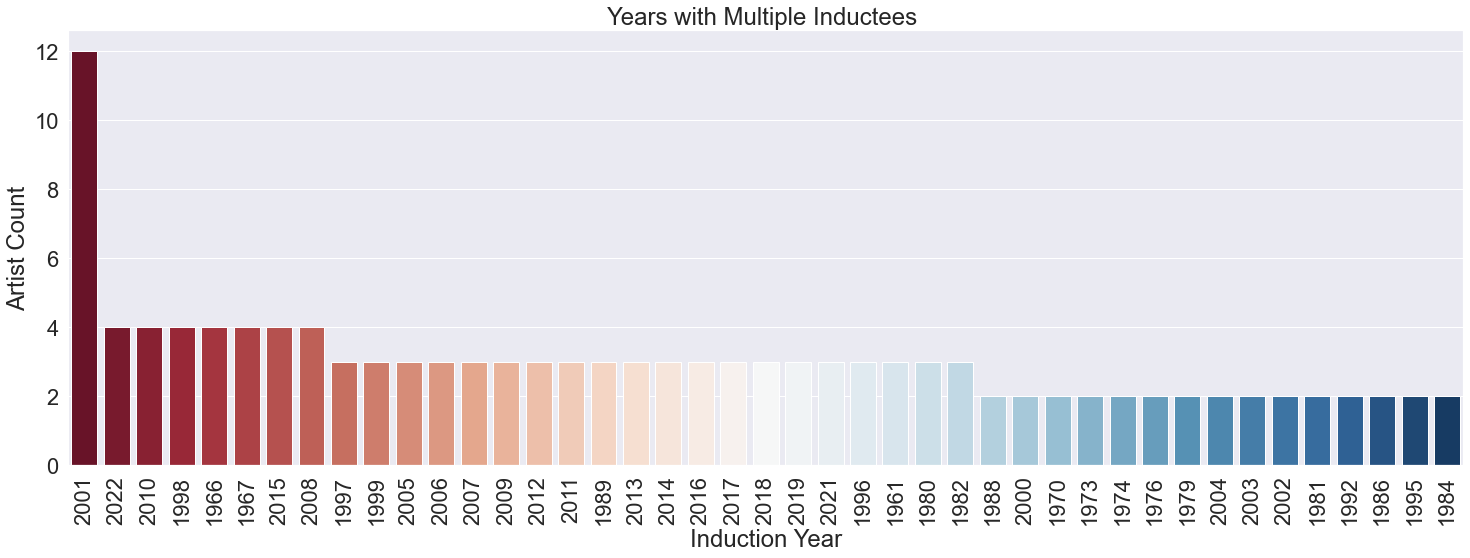

In [18]:
#5
#Code for years with multiple inductions per year
artistCount_df = pd.DataFrame(inductees_df.groupby('Induction Year', as_index=False)['Artist'].count().sort_values(['Artist'],ascending=False))
artistCountAbove1_df = artistCount_df[artistCount_df.Artist > 1] 

#Viz
rcParams['figure.figsize'] = 25,8
sns.set(font_scale = 2)
ax = sns.barplot(x='Induction Year', y='Artist', data=artistCountAbove1_df,
                 palette= 'RdBu')
ax.set(xlabel= 'Induction Year')
ax.set(ylabel= 'Artist Count')
ax.set_title('Years with Multiple Inductees ')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

#Would have loved to have done this in a line plot, but couldn't get the years as x-ticks to show up on the x-axis. I'd welcome any suggestions
#as line charts are the most appropriate chart for showing values over time. 

In [19]:
#5 Continued
#Total amount of inductees from years only with multiple inductees
artistCount_df = pd.DataFrame(inductees_df.groupby('Induction Year', as_index=False)['Artist'].count().sort_values(['Artist'],ascending=False))
artistCountAbove1 = artistCount_df[artistCount_df.Artist > 1] 
artistSumAbove1 = artistCountAbove1.Artist.sum()
artistSumAbove1

130

In [20]:
#5 Continued
#Total amount of inductees from years only with one inductee
artistCount_df = pd.DataFrame(inductees_df.groupby('Induction Year', as_index=False)['Artist'].count().sort_values(['Artist'],ascending=False))
artistCountEquals1 = artistCount_df[artistCount_df.Artist == 1] 
artistSumEquals1 = artistCountEquals1.Artist.sum()
artistSumEquals1

17

In [21]:
#5 Continued
#List of years with only 1 inductee  
artistCount_df = pd.DataFrame(inductees_df.groupby('Induction Year', as_index=False)['Artist'].count().sort_values(['Induction Year'],ascending=False))
artistCountEquals1 = artistCount_df[artistCount_df.Artist == 1]
artistCountEquals1 

,Induction Year,Artist
32,1994,1
31,1993,1
29,1991,1
28,1990,1
25,1987,1
23,1985,1
21,1983,1
16,1978,1
15,1977,1
13,1975,1


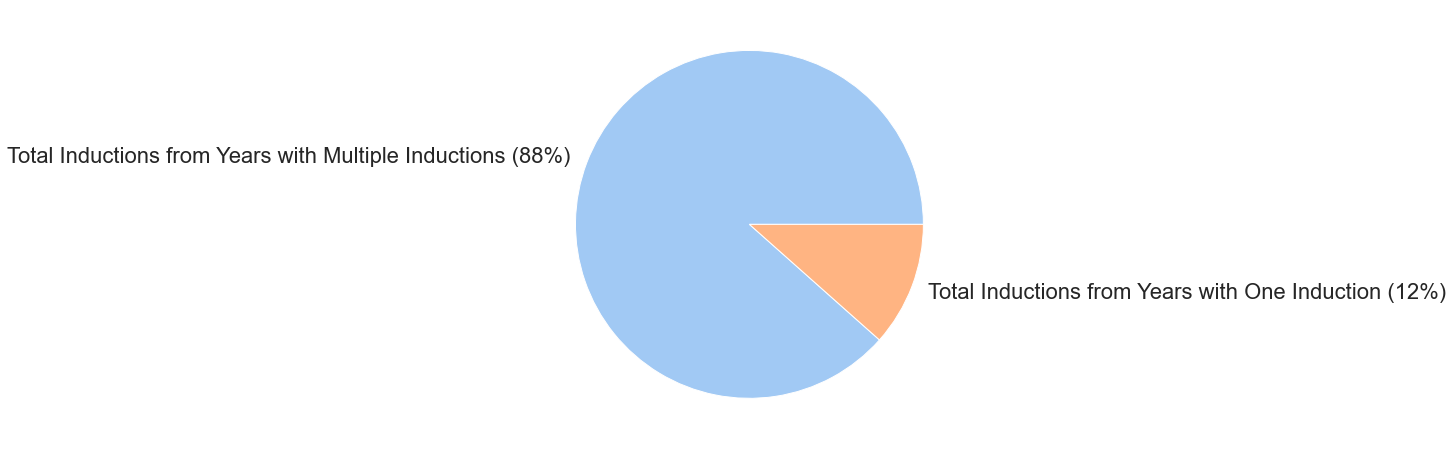

In [28]:
#5 Concluded
#Pie chart-split by total inductions from years with multiple inductions and total inductions from years with single inductions 
artist_sums = (artistSumAbove1, artistSumEquals1)
labels = ['Total Inductions from Years with Multiple Inductions (88%)', 'Total Inductions from Years with One Induction (12%)']
colors = sns.color_palette('pastel')

plt.pie(artist_sums, labels=labels, colors=colors)
plt.show()